# 2. Time series graphics

The first thing to do in any data analysis task is to plot the data. Graphs enable many features of the data to be visualised, including patterns, unusual observations, changes over time, and relationships between variables. __The features that are seen in plots of the data must then be incorporated, as much as possible, into the forecasting methods to be used.__ Just as the type of data determines what forecasting method to use, it also determines what graphs are appropriate.

## 2.1. ts objects
 Time series object is indexed with datetime object ( having a constant frequency)
and values are meant for those time stamp

## 2.2. Time plots

The idea is to be able to visualize time series object in best possible way . A starting point could be line plot.

## 2.3. Time Series patterns

* A __trend__  exists when there is a long-term increase or decrease in the data. It does not have to be linear.

* A __seasonal__ pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week. Seasonality is always of a fixed and known frequency.

* A __cycle__ occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations are usually due to economic conditions, and are often related to the “business cycle”. 


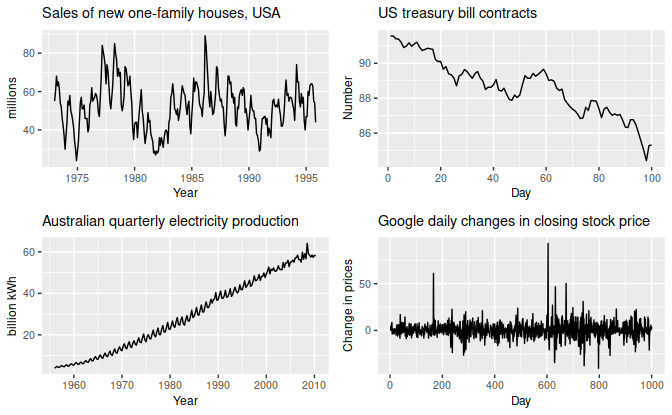

In [112]:
from IPython.display import Image
Image(filename="./data/fourexamples-1.png") 

### Four examples of time series showing different patterns
1. The monthly housing sales (top left) show strong seasonality within each year, as well as some strong cyclic behaviour with a period of about 6–10 years. There is no apparent trend in the data over this period.
2. The US treasury bill contracts (top right) show results from the Chicago market for 100 consecutive trading days in 1981. Here there is no seasonality, but an obvious downward trend. Possibly, if we had a much longer series, we would see that this downward trend is actually part of a long cycle, but when viewed over only 100 days it appears to be a trend.
3. The Australian quarterly electricity production (bottom left) shows a strong increasing trend, with strong seasonality. There is no evidence of any cyclic behaviour here.
4.The daily change in the Google closing stock price (bottom right) has no trend, seasonality or cyclic behaviour. There are random fluctuations which do not appear to be very predictable, and no strong patterns that would help with developing a forecasting model.

## 2.4. Seasonal Plots

Seasonal plots are helpful to visualize the variation within a annual series. Here are two example of how seasonal plots.
Plotting these in python would required pandas groupby and use of seaborn library respectively.

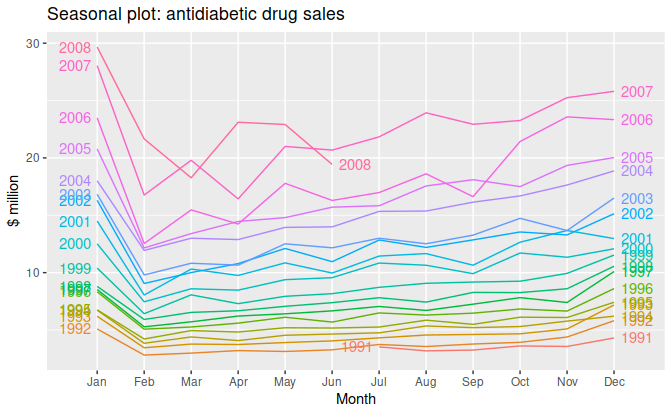

In [113]:
Image(filename="./data/seasonplot1-1.png") 

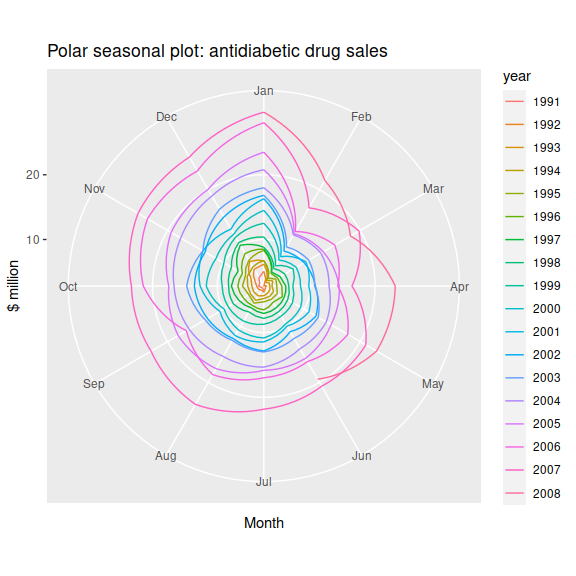

In [114]:
Image(filename="./data/seasonplot2-1.png") 

## 2.5. Seasonal subseries plot
An alternative plot that emphasises the seasonal patterns is where the data for each season are collected together in separate mini time plots.

In example below :

The horizontal lines indicate the means for each month. This form of plot enables the underlying seasonal pattern to be seen clearly, and also shows the changes in seasonality over time. It is especially useful in identifying changes within particular seasons.

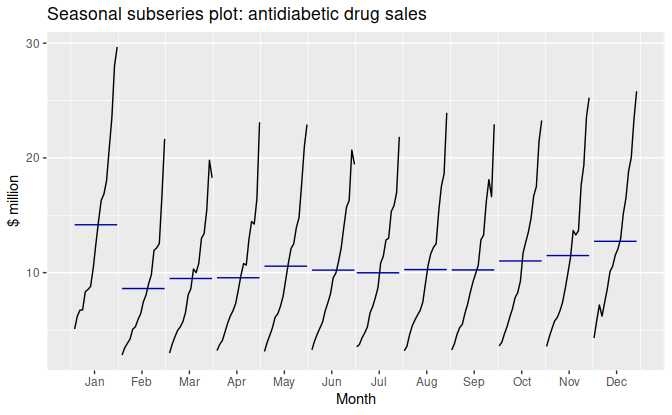

In [115]:
Image(filename="./data/subseriesplot-1.png") 

## 2.6. Scatterplots

* Scatter plots are pretty easy to plot in python.
* plt.scatterplot , pandas.plot.scatterplot
* Correlation coefficient could be misleading. As evident from below plot. As all four images have same correlation  coefficient of 0.82. 
* __ALWAYS__ plot a correlation plot.

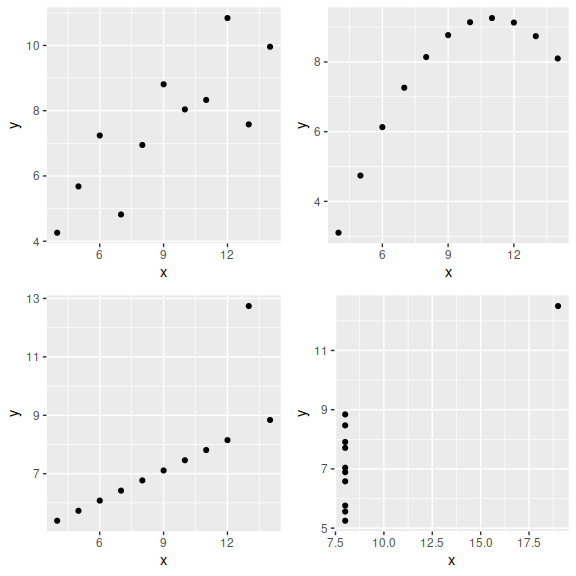

In [116]:
Image(filename='./data/anscombe-1.png')

### scatterplot matrices

It is very important to plot pair wise scatterplot , i.e. compare features among themselves.

If the data is in pandas dataframe, it can be easy plotted using sns.pairplot ( seaborn pairplot)

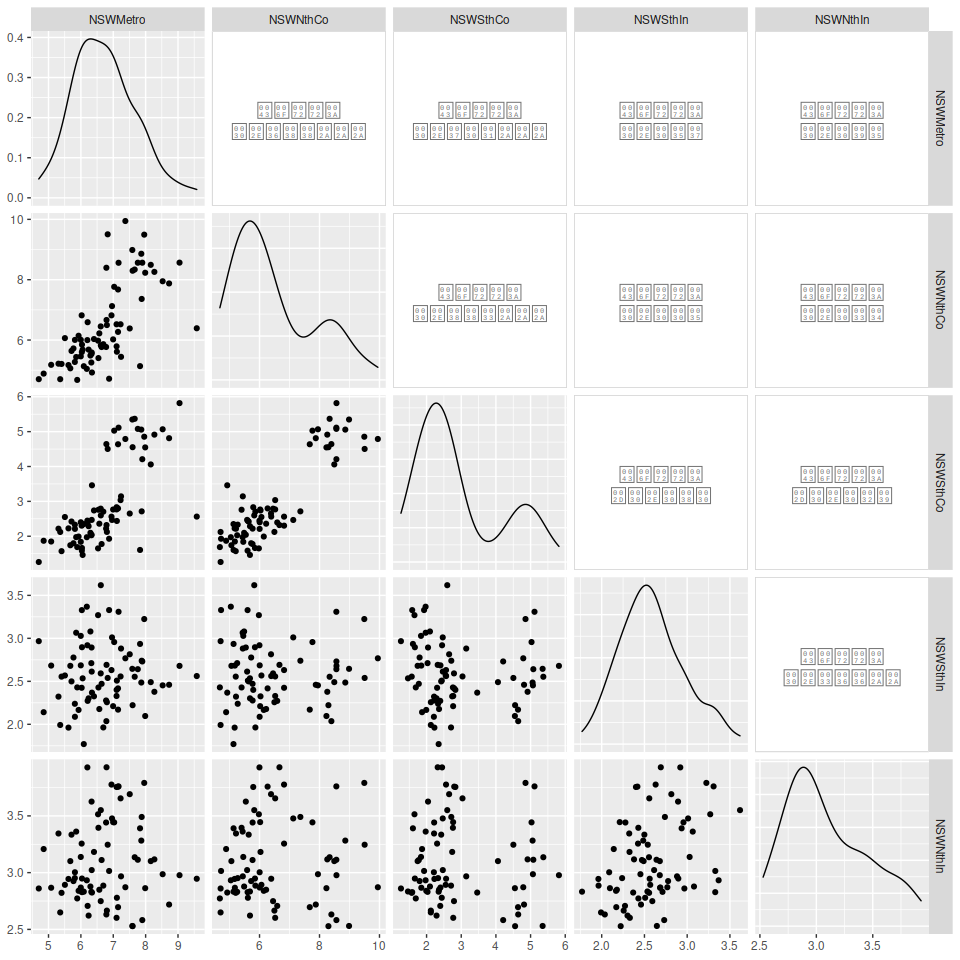

In [117]:
Image(filename="./data/ScatterMatrixch2-1.png")

## 2.7 Lag plots

where the horizontal axis shows lagged values of the time series. Each graph shows $y_t$ plotted against $y_{t-k}$ 
for different values of k.


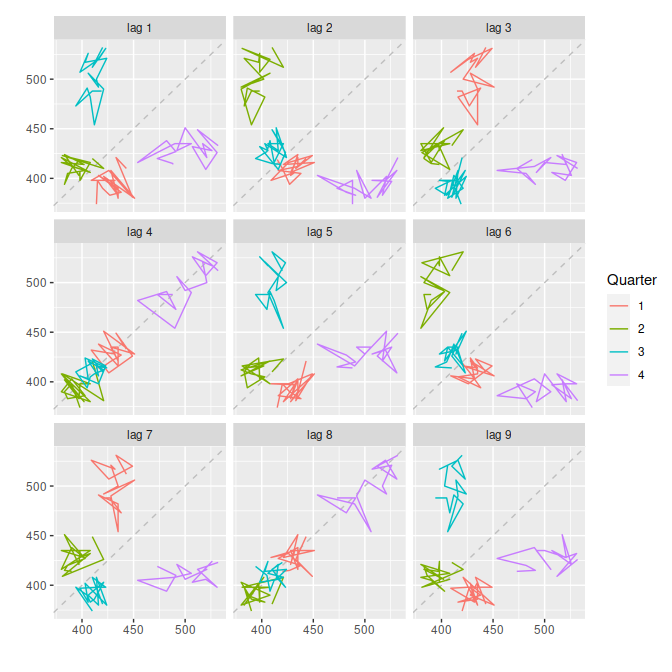

In [118]:
Image(filename='./data/beerlagplot-1.png')

Here the colours indicate the quarter of the variable on the vertical axis. The lines connect points in chronological order. The relationship is strongly positive at lags 4 and 8, reflecting the strong seasonality in the data. The negative relationship seen for lags 2 and 6 occurs because peaks (in Q4) are plotted against troughs (in Q2

## 2.8 Autocorrelation

__autocorrelation__ measures the linear relationship between lagged values of a time series.
There are several autocorrelation coefficients, corresponding to each panel in the lag plot. For example,  
$r_1$ measures the relationship between  $y_t$ and  $y_{t-1}$ ,  
$r_2$ measures the relationship between  $y_t$ and  $y_{t−2}$ , and so on.

The autocorrelation coefficients are plotted to show the autocorrelation function or ACF. The plot is also known as a __correlogram__.

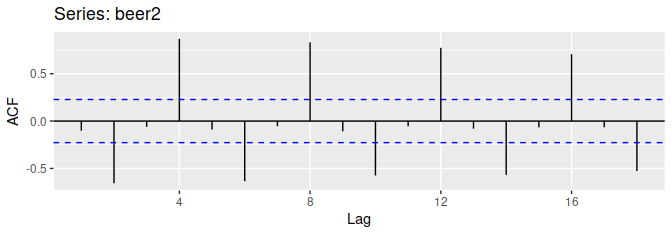

In [119]:
Image('./data/beeracf-1.png')

### Trend and seasonality in ACF plots

When data have a __trend__, the autocorrelations for __small lags tend to be large and positive__ because observations nearby in time are also nearby in size. So the ACF of trended time series tend to have positive values that slowly decrease as the lags increase.

When data are __seasonal__, the autocorrelations will be __larger for the seasonal lags__ (at multiples of the seasonal frequency) than for other lags.

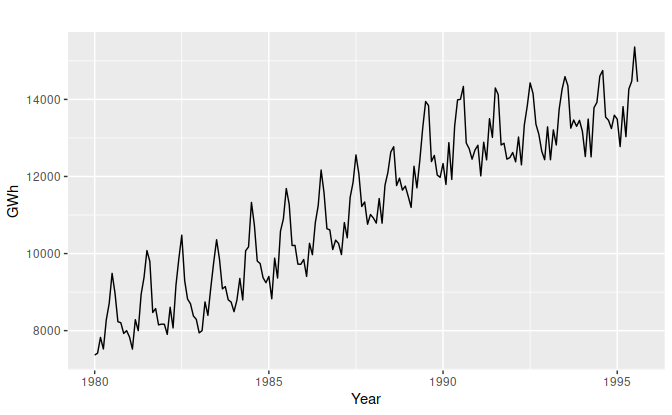

In [120]:
Image('./data/aelec-1.png')

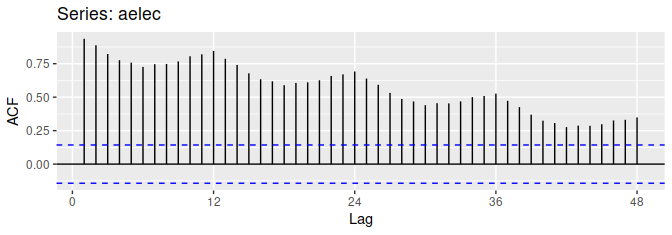

In [121]:
Image('./data/acfelec-1.png')

The slow decrease in the ACF as the lags increase is due to the trend, while the “scalloped” shape is due the seasonality.

## 2.9 White Noise
Time series that show no autocorrelation are called white noise.

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_acf(arr):
    f , ax = plt.subplots(2,1,figsize=(12,4),sharex=True)
    ax[0].plot(arr)
    ax[0].set_ylabel('Time Series')
    ax[0].grid(True,alpha=.6)
    pd.plotting.autocorrelation_plot(arr,ax=ax[1])

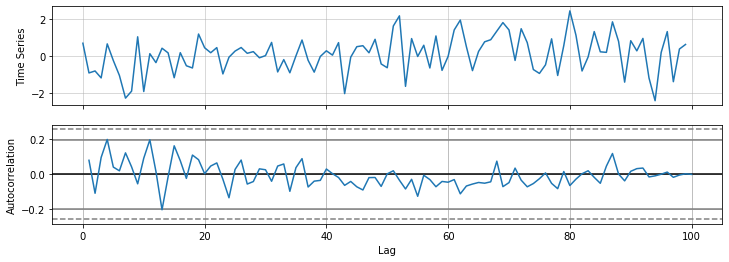

In [123]:
white_noise = pd.np.random.normal(0,1,100)
plot_acf(white_noise)

For white noise series, we expect each autocorrelation to be close to zero. Of course, they will not be exactly equal to zero as there is some random variation. For a white noise series, we expect 95% of the spikes in the ACF to lie within $ ± 2/√T $ where  $T$ is the length of the time series. It is common to plot these bounds on a graph of the ACF (thick line ). If one or more large spikes are outside these bounds, or if substantially more than 5% of spikes are outside these bounds, then the series is probably not white noise.

In this example,  T = 100 and so the bounds are at  ± 2/√100=± 0.20 . All of the autocorrelation coefficients lie within these limits, confirming that the data are white noise.

## 2.10 Excercise

In [124]:
tute = pd.read_csv('./data/tute1.csv',index_col=[0])

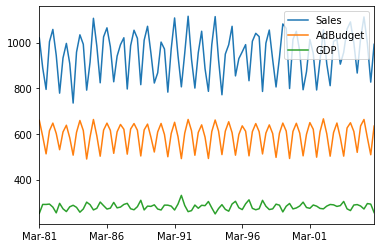

In [125]:
tute.plot()

In [126]:
tute.index = pd.to_datetime(tute.index,format='%b-%y')

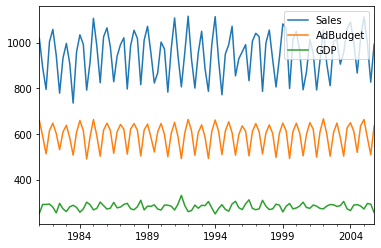

In [127]:
tute.plot()

In [131]:
# seasonal plot

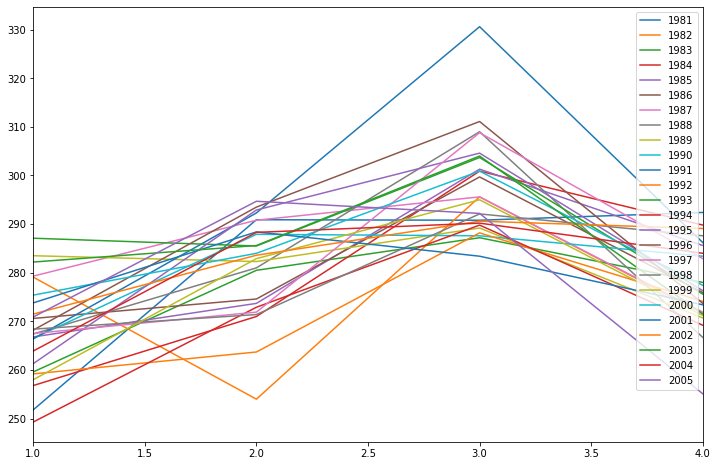

In [147]:
pd.pivot_table(tute,index=tute.index.quarter,columns=tute.index.year,values='GDP',aggfunc='sum').plot(figsize=(12,8))

In [150]:
df  = tute[['GDP']]

In [175]:
import seaborn as sns
def lag_plot(series,lags=5):
    '''
    returns pair plot for the time series 
    lagged upto the required number.
    Please dont overkill the purpose
    keeps lags upto = 5 -10 range
    
    Parameters
    ----------------
    ----------------
    series : numpy vector (array)
    
    Returns 
    -----------------
    -----------------
    
    fig , ax object
    '''
    df = pd.DataFrame(series,columns=['Yt'])
    for lag in range(1,lags+1):
        df['lag_{}'.format(lag)] = df['Yt'].shift(lag)
    return sns.pairplot(df)

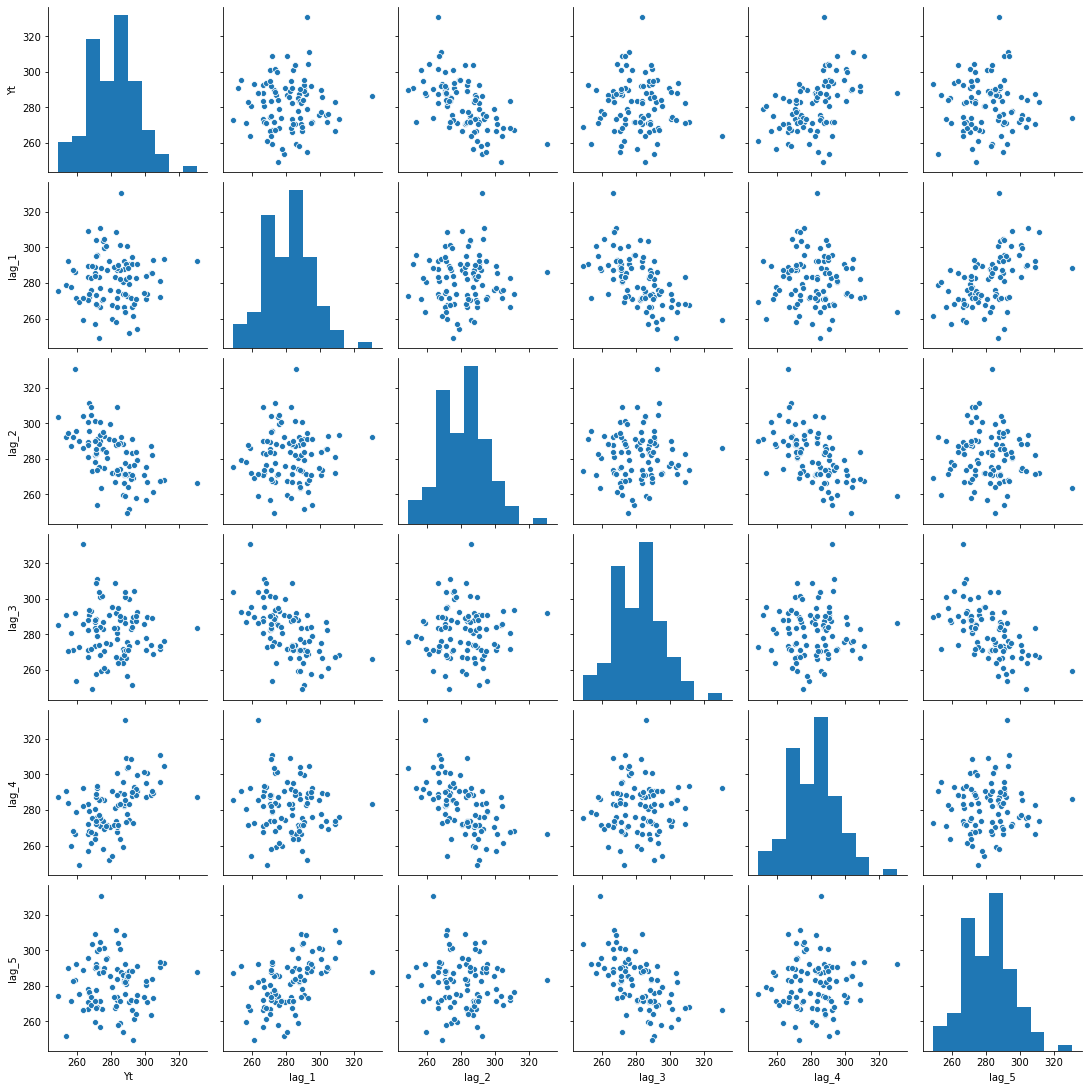

In [176]:
ax = lag_plot(df.values,5)